# Life expectancy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Prep Data

In [3]:
data = pd.read_csv("all_data.csv")
data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


### Formating the DataFrame

In [36]:
data.rename(columns = {"Life expectancy at birth (years)" : "leby"},inplace = True)
data

,Country,Year,leby,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


## Examine Data

### Columns names

In [13]:
data.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

### Columns data type

In [14]:
data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

### Countries in the data

In [25]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

### Years in the data

In [26]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

### Looking for duplicated rows

In [30]:
data.duplicated().value_counts()


False    96
dtype: int64

### Looking for null cells

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Exploring Data

### Average Life Expectancy for eaach country

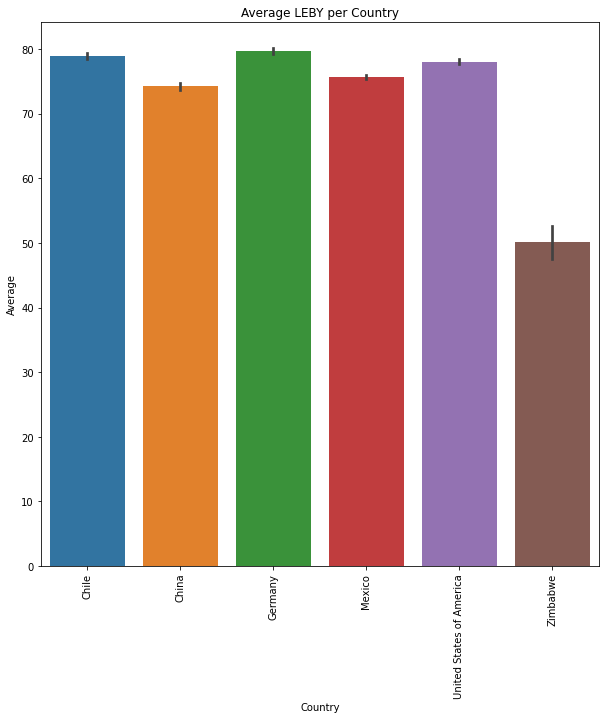

In [74]:
countries = list(data.Country.unique())

plt.figure(figsize = (10,10))


sns.barplot(data = data, x = "Country", y = "leby")
plt.title("Average LEBY per Country")
plt.xlabel("Country")
plt.ylabel("Average")

plt.xticks(rotation = 90)
plt.show()

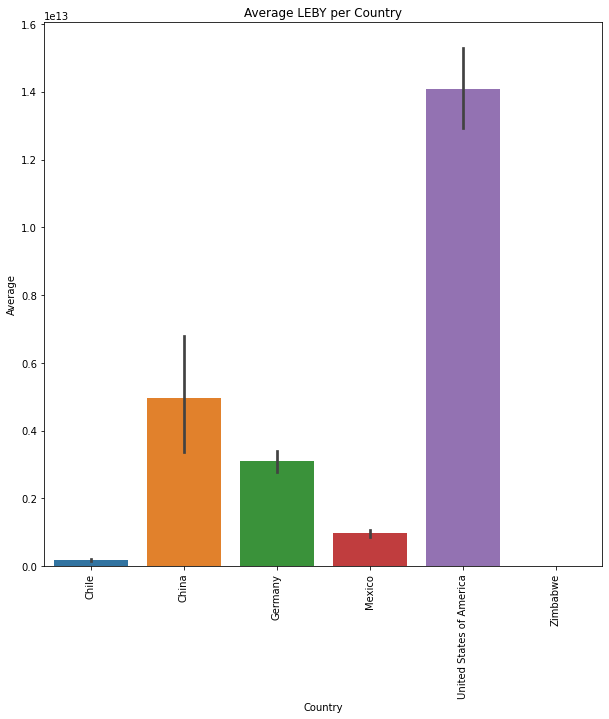

In [72]:
countries = list(data.Country.unique())

plt.figure(figsize = (10,10))


sns.barplot(data = data, x = "Country", y = "GDP")
plt.title("Average LEBY per Country")
plt.xlabel("Country")
plt.ylabel("Average")

plt.xticks(rotation = 90)

plt.show()

One of the countries with the highest GDP has the longest life expectancy, while the country with the lowest GDP has the lowest life expectancy. This tells us that there can be a proportional relationship between these two variables. However, when observing the rest of the countries, there seems to be no relationship between them. We see the case of China, Mexico or even Germany. Therefore, life expectancy must be due to other relationships and not to GDP.

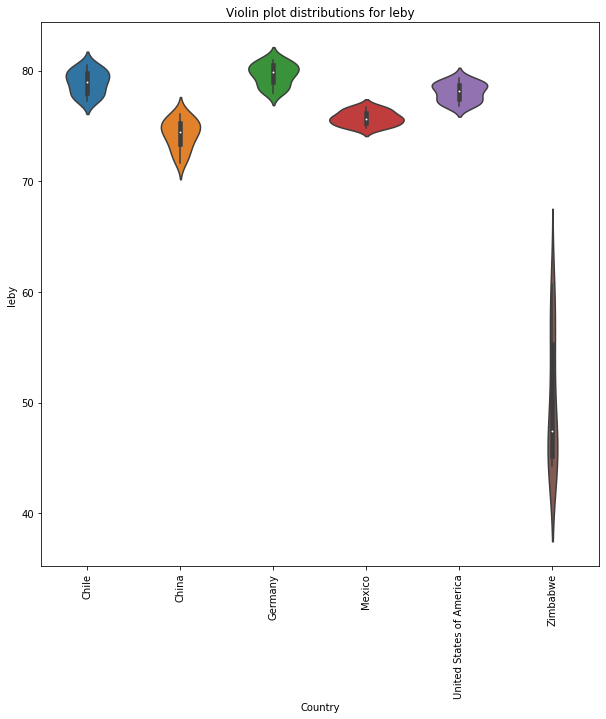

In [84]:
plt.figure(figsize = (10, 10))
sns.violinplot(data = data, x = "Country", y = "leby")
plt.title("Violin plot distributions for leby")
plt.xticks(rotation = 90)
plt.show()

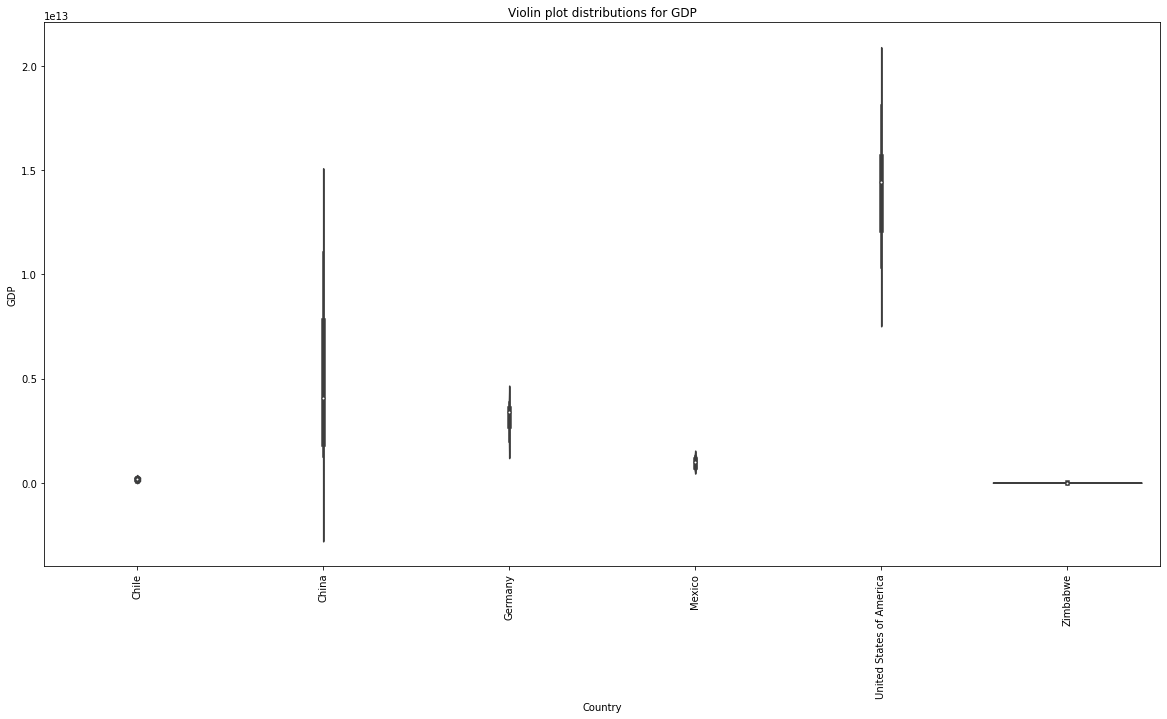

In [85]:
plt.figure(figsize = (20, 10))
sns.violinplot(data = data, x = "Country", y = "GDP")
plt.title("Violin plot distributions for GDP")
plt.xticks(rotation = 90)
plt.show()

We can see that LEBY's Zimbawee has changed most over the time

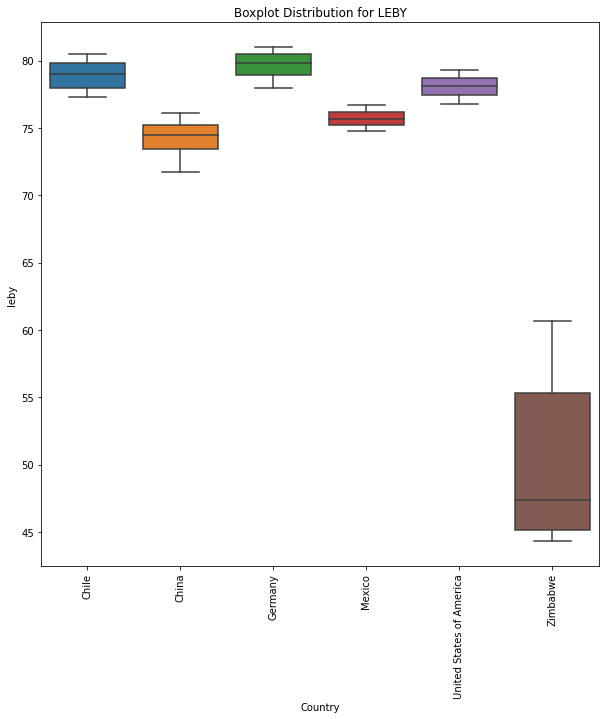

In [86]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = data, x = "Country", y = "leby")
plt.title("Boxplot Distribution for LEBY")
plt.xticks(rotation = 90)
plt.show()

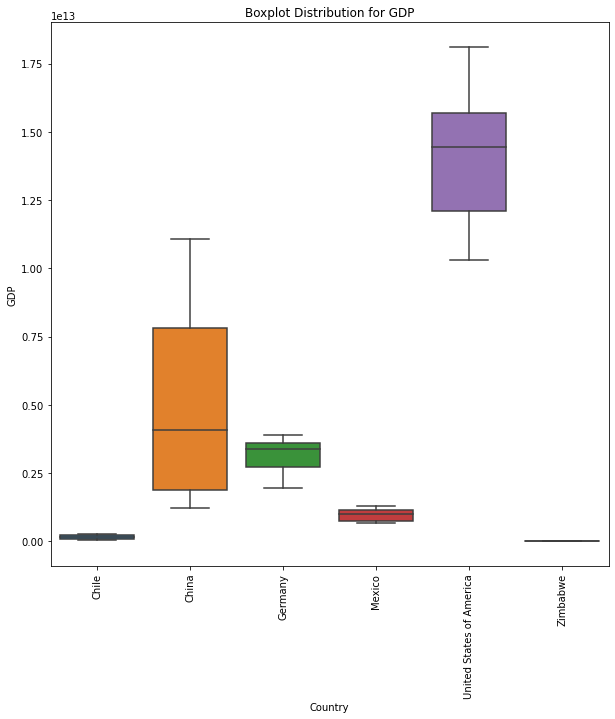

In [88]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = data, x = "Country", y = "GDP")
plt.title("Boxplot Distribution for GDP")
plt.xticks(rotation = 90)
plt.show()

Zimbawee's GDP has not changed too much over the time

### Hypothesis Testing

In [89]:
from scipy.stats import ttest_ind

In [91]:
t, pval = ttest_ind(data.leby, data.GDP)
print(pval)

7.007737118375318e-12


## Bar Plots Of GDP and Life Expectancy over time

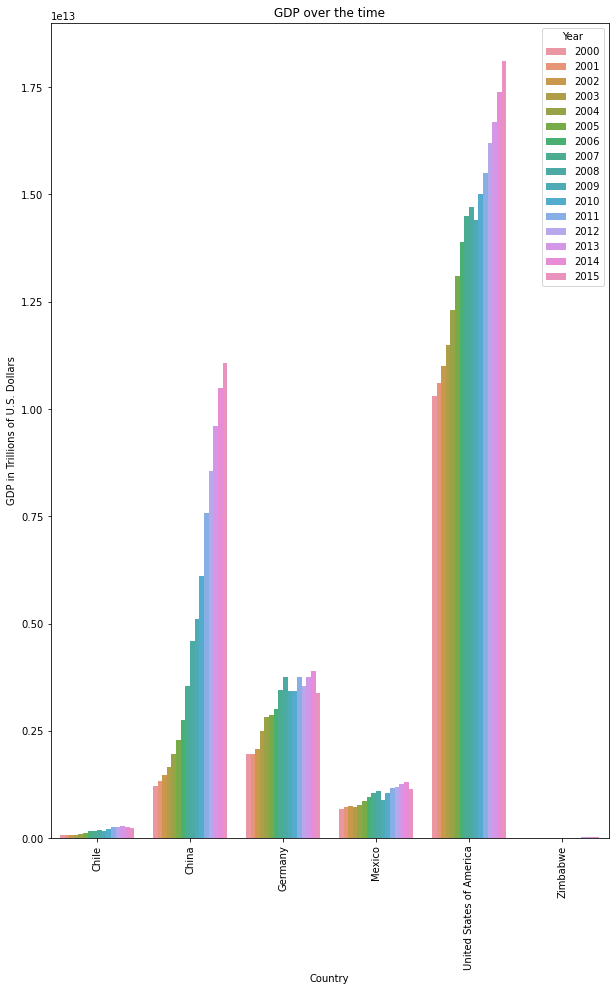

In [94]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=data)
plt.title("GDP over the time")
plt.xticks(rotation=90)
ylabel="GDP in Trillions of U.S. Dollars"
plt.ylabel(ylabel)
plt.show()

Again, GDP has not changed much for Zimbawee. Also for Mexico and Chile it has not changed too much. These are poor countries. China has changed his GDP too much

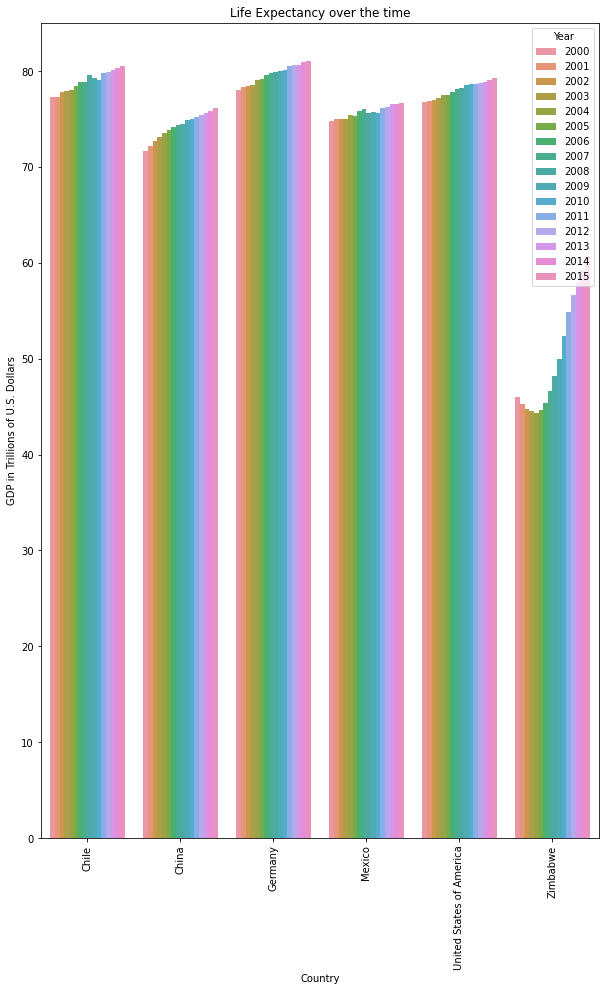

In [95]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="leby", hue="Year", data=data)
plt.title("Life Expectancy over the time")
plt.xticks(rotation=90)
ylabel="GDP in Trillions of U.S. Dollars"
plt.ylabel(ylabel)
plt.show()

The Zimbawee's LEBY has changed too mucho over the time

## Scatter Plots of GDP and Life Expectancy Data

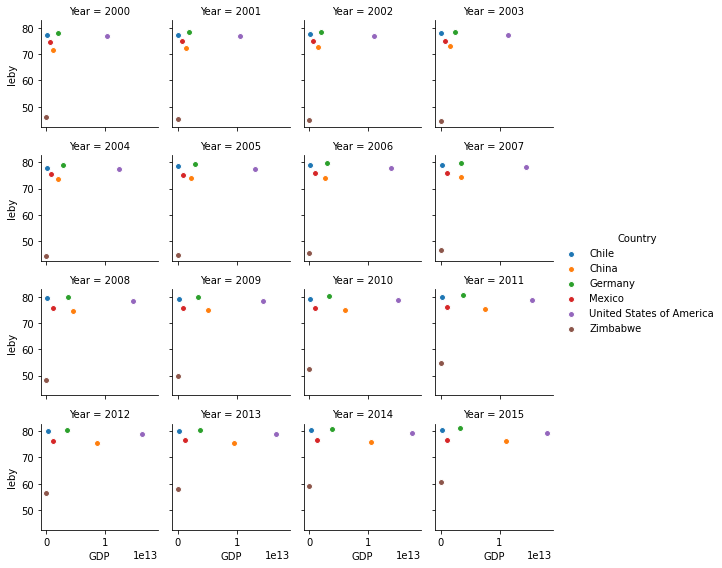

In [104]:

g = sns.FacetGrid(data, col="Year", hue="Country", col_wrap=4, height=2)
g = (g.map(plt.scatter, "GDP", "leby", edgecolor="w").add_legend())
plt.show()

### Line plot for LEBY

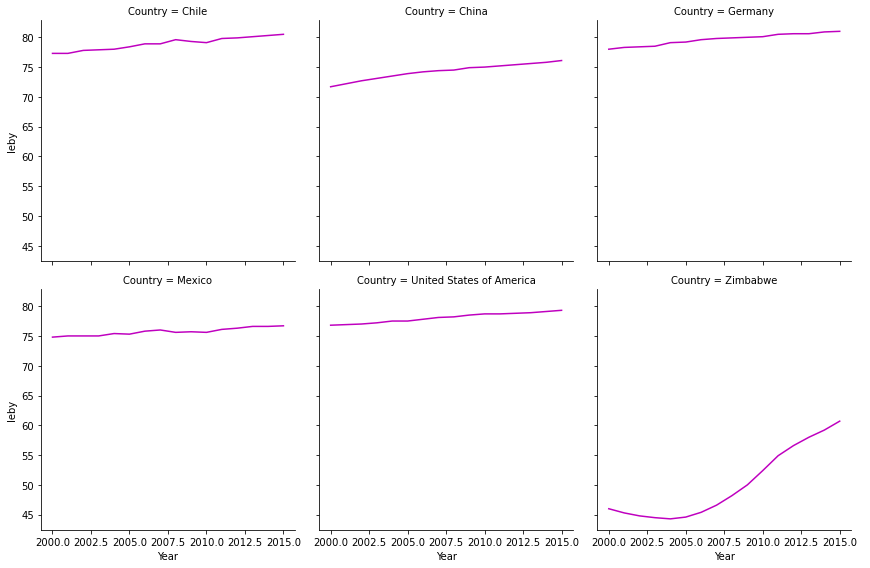

In [103]:
g3 = sns.FacetGrid(data, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "leby",color="m").add_legend())
plt.show()

### Line plot for GDP

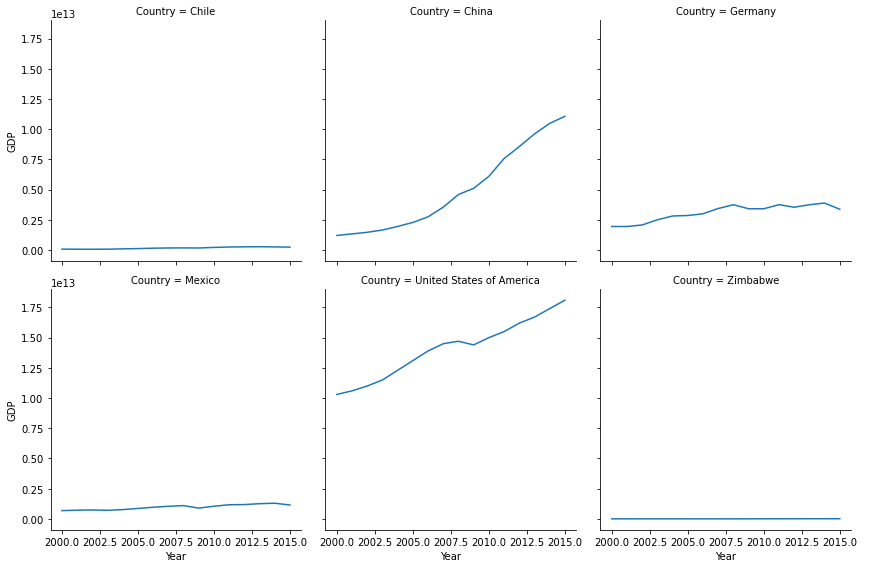

In [106]:
g2 = sns.FacetGrid(data, col="Country", col_wrap=3, height=4)
g2 = (g2.map(plt.plot, "Year", "GDP").add_legend())
plt.show()